Part 3: Feature Matching
This task is based on SIFT feature detection and desciption, and to try different feature matching methods.

We have provided the whole pipeline for SIFT+Feature Matching
https://github.com/allan-tulane/CMPS3660-6660/blob/main/SIFT_OpenCV.ipynb

For the below code, we use SIFT to obtain the detected and described features, the next step is to write code to match them (i.e., given a feature in one image, find the best matching feature in another image).

The simplest approach is the following: compare two features and calculate a scalar distance between them. The best match is the feature with the smallest distance. You will implement two distance functions:
*   **Sum of squared differences (SSD)**: https://en.wikipedia.org/wiki/Euclidean_distance
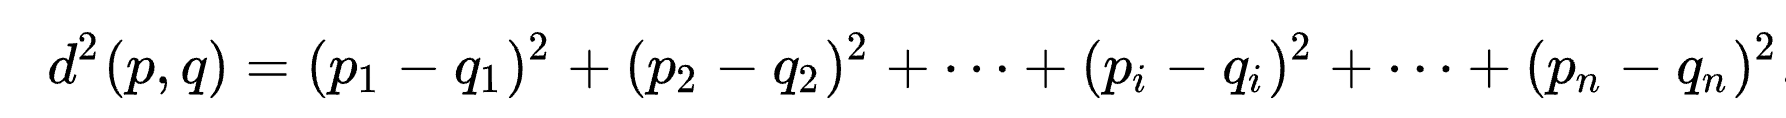
*   **The ratio test distance**: Find the closest and second closest features by SSD distance. The ratio test distance is their ratio (i.e., SSD distance of the closest feature match divided by SSD distance of the second closest feature match).


### Imports and Given Code

In [12]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Computer Vision/Assignment2/'

train_img = cv2.imread(img_path+'Tree1.jpeg')
query_img = cv2.imread(img_path+'Tree2.jpeg')

# Turn Images to grayscale

def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

train_img_gray = to_gray(train_img)
query_img_gray = to_gray(query_img)

# Initialise SIFT detector  
sift = cv2.SIFT_create()

# Generate SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute(train_img_gray, None)
query_kp, query_desc = sift.detectAndCompute(query_img_gray, None)

### Feature Matching


#### SSD

In [18]:
def SSD(i, j):
  x = i[0]- j[0]
  y = j[1] - i[1]
  return x**2 + y**2

def SSD_matching(train, query):
  train_img_points = []
  query_img_points = []
  for i in train:
    train_img_points.append(i.pt)
  for j in query:
    query_img_points.append(j.pt)

  matches = [] 

## Matching Key Points ##

  for i in train_img_points:
    key_points = []
    smallest_num_SSD = np.inf # Set to inf to be replaced

    for j in query_img_points: 
      if SSD(i, j) <= smallest_num_SSD:  # Closest distance to another
        smallest_num_SSD = SSD(i, j)
        key_points.clear()
        key_points.append([i, j, SSD(i, j)])

    matches.extend(key_points)
    key_points.clear()

  return matches


print(SSD_matching(train_kp, query_kp))

[[(4.356657981872559, 645.1992797851562), (9.4833402633667, 579.8154296875), 4301.330724808169], [(6.420254230499268, 741.3602905273438), (9.4833402633667, 579.8154296875), 26106.124559809232], [(6.984035491943359, 732.9348754882812), (9.4833402633667, 579.8154296875), 23451.811206678845], [(6.984035491943359, 732.9348754882812), (9.4833402633667, 579.8154296875), 23451.811206678845], [(8.366205215454102, 706.0032958984375), (9.4833402633667, 579.8154296875), 15924.625569584736], [(8.432830810546875, 757.253173828125), (9.4833402633667, 579.8154296875), 31485.256615824364], [(8.432830810546875, 757.253173828125), (9.4833402633667, 579.8154296875), 31485.256615824364], [(9.890663146972656, 772.463134765625), (9.4833402633667, 579.8154296875), 37113.30418379974], [(9.961370468139648, 709.3052368164062), (9.4833402633667, 579.8154296875), 16767.838663158014], [(9.961370468139648, 709.3052368164062), (9.4833402633667, 579.8154296875), 16767.838663158014], [(10.745819091796875, 775.62573242

#### Ratio Test

In [26]:
def ratio(ssd_1, ssd_2): # For clarity

  return ssd_1 / ssd_2 

def ratio_test_difference(train, query):
  train_img_points = []
  query_img_points = []

  for i in train:
    train_img_points.append(i.pt)
  for j in query:
    query_img_points.append(j.pt)

  matches = [] 

  ## Matching Key Points ##

  for i in train_img_points:
    key_points = []
    smallest_num_SSD = np.inf # Set to inf to be replaced by smaller
    second_smallest_num_SSD = np.inf
  
    # First smallest
    for j in query_img_points: 
      if SSD(i, j) <= smallest_num_SSD:  
        smallest_num_SSD = SSD(i, j)
        key_points.clear()

    # Second smallest
    for j in query_img_points:
      if SSD(i, j) != smallest_num_SSD and SSD(i, j) <= second_smallest_num_SSD :  
        second_smallest_num_SSD = SSD(i, j)
        key_points.clear()

    key_points.append([i, j, ratio(smallest_num_SSD,second_smallest_num_SSD)])

    matches.extend(key_points)
    key_points.clear()

  return np.array(matches, dtype= 'object')

In [27]:
# Testing
print(ratio_test_difference(train_kp, query_kp)[:, 2])

[0.7285891385274135 0.9655823443342083 0.9602167373881111 ...
 0.9460138777135876 0.9460138777135876 0.9450736429467502]


### TESTS

In [15]:
## TESTS ##

## demo code for reference
##print the 128-dim feature for one keypoint in train image
print(train_desc[0,:])


##print the size of keypoints for train image
print(len(train_kp))

## pick the keypoint with index 1 and obtain the x,y coordinater
(x,y) = train_kp[1].pt
print(x, y)




[ 23.  26.   4.   1.  10.   4.   0.  12. 127.  45.   0.   0.   0.   0.
   0.  17. 168.  84.   0.   0.   0.   0.   0.  30. 112.  25.   0.   0.
   0.   1.  25.  76.  31.   0.   0.   2.  16.   3.   3.  96.  73.  26.
   4.   6.  15.   5.   6.  54. 168.  43.   2.   1.   1.   0.   0.  27.
 168.  29.   6.   6.   3.   2.  11.  26.  93.   3.   0.   1.   9.  12.
   5.  56.  62.   4.   1.   2.  34.  55.  10.  26. 168.  38.   0.   0.
   2.   3.   2.  38. 168.  50.   3.   1.   0.   0.   2.  12.  37.   2.
   0.   0.   2.   3.   1.   5.  20.   1.   0.   0.  12.  19.   2.   4.
 125.  25.   0.   0.   1.   1.   0.   3.  67.  16.   1.   0.   0.   0.
   0.   8.]
7481
6.420254230499268 741.3602905273438
